In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 1s 0us/step


In [ ]:
df=pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


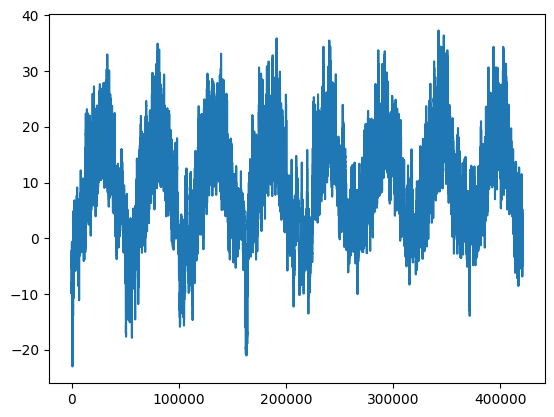

In [ ]:
temp=df["T (degC)"]
plt.plot(temp)

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X,Y=df_to_X_y(temp,5)
X.shape,  Y.shape

((420546, 5, 1), (420546,))

In [ ]:
X_tr=X[:60000]
y_tr=Y[:60000]
X_v=X[60000:70000]
y_v=Y[60000:70000]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [ ]:
model=Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(64))
model.add(Dense(8,"relu"))
model.add(Dense(1,"linear"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X_tr,y_tr,validation_data=(X_v,y_v),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.0425 - root_mean_squared_error: 0.2061 - val_loss: 0.0518 - val_root_mean_squared_error: 0.2276
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0420 - root_mean_squared_error: 0.2051 - val_loss: 0.0519 - val_root_mean_squared_error: 0.2277
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0416 - root_mean_squared_error: 0.2039 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2311
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0414 - root_mean_squared_error: 0.2035 - val_loss: 0.0531 - val_root_mean_squared_error: 0.2304
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0414 - root_mean_squared_error: 0.2034 - val_loss: 0.0544 - val_root_mean_squared_error: 0.2333
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0412 - root_mean_squared_error: 0.2030 - val_l

In [ ]:
test=X[70000:100000]
test.shape

(30000, 5, 1)

In [ ]:
predicted=model.predict(test).flatten()
Data=pd.DataFrame(data={'predicted':predicted,"Actual":Y[70000:100000]})
Data

938/938 [==============================] - 3s 3ms/step


,predicted,Actual
0,8.533712,8.50
1,8.466537,8.42
2,8.386753,8.28
3,8.224297,8.12
4,8.053714,8.10
...,...,...
29995,1.245117,1.12
29996,1.175060,1.08
29997,1.095298,1.01
29998,0.996303,1.45
